In [5]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('fivethirtyeight')

%matplotlib inline
%matplotlib notebook

In [6]:
data = pd.read_csv('./data.csv', names=["x", "y"])

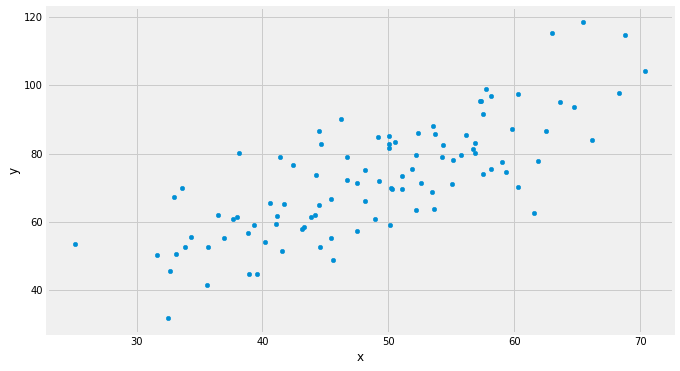

In [7]:
plot = data.plot("x", "y", kind="scatter", figsize = (10,6))

At this point, what we usually do is instantiate our linear regression model and fit against our data.

In [8]:
#Calculate error
def calc_error_for_line_given_points(b, m, points):
    total_error = 0
    for i in range(0, len(points)):
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

#Updates b and m
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

In [63]:
#Run gradient descent
def gradient_descent(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    error = []

    for i in range(1, num_iterations + 1):

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 6))
        
        #Fitting Linear Line
        data["y_pred"] = (data["x"] * m) + b
        plt.ylim((-1,125))
        plt.xlim((-1, 75))
        ax[0].scatter(data["x"], data["y"])
        ax[0].plot(data["x"], data["y_pred"])
        
        #updating b and m
        b, m = step_gradient(b, m, array(points), learning_rate)
        if i % 10 == 0:
            print("After {0} iterations b = {1}, m = {2}, error = {3}".format(i, b, m, calc_error_for_line_given_points(b, m, points)))
               
        #Loss Function
        error.append(calc_error_for_line_given_points(b, m, points))
        plt.ylim((0,1600))
        plt.xlim((-1, num_iterations))
        ax[1].plot(error, marker='*', markersize=12)

        
    return [b, m]

After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499742


[0.02963934787473239, 1.4774173755483797]

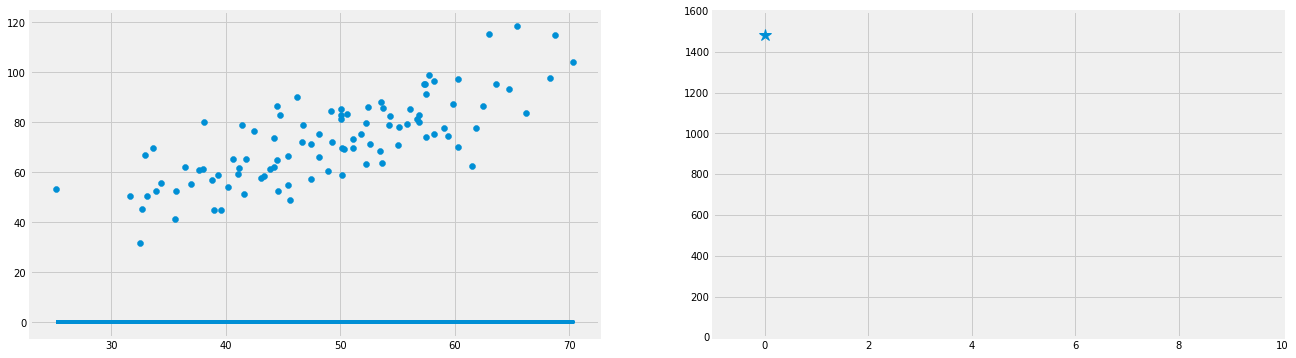

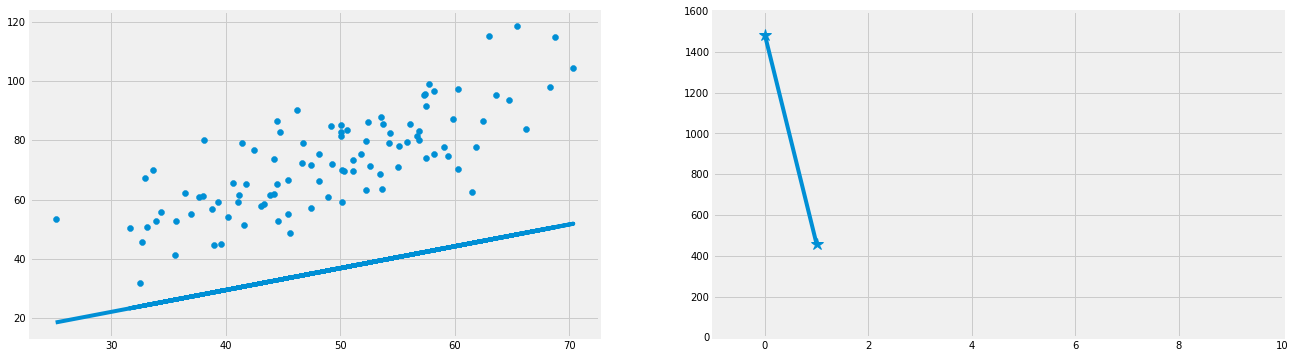

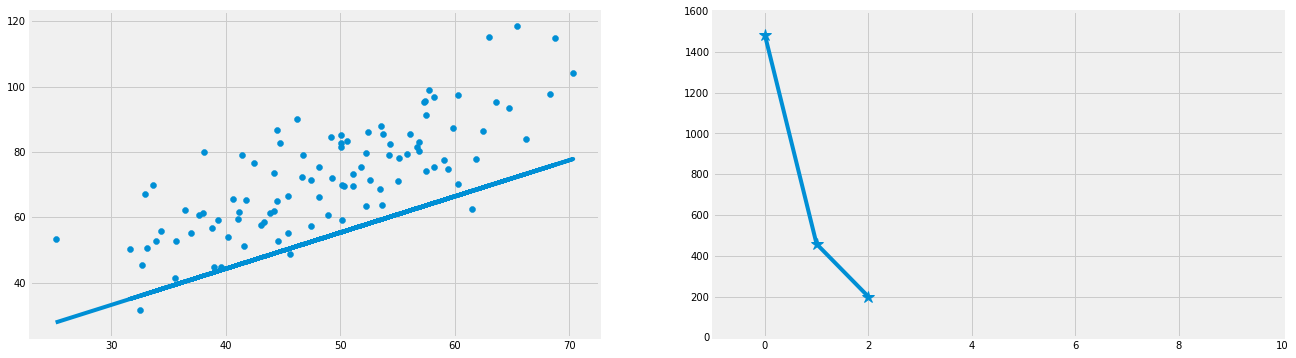

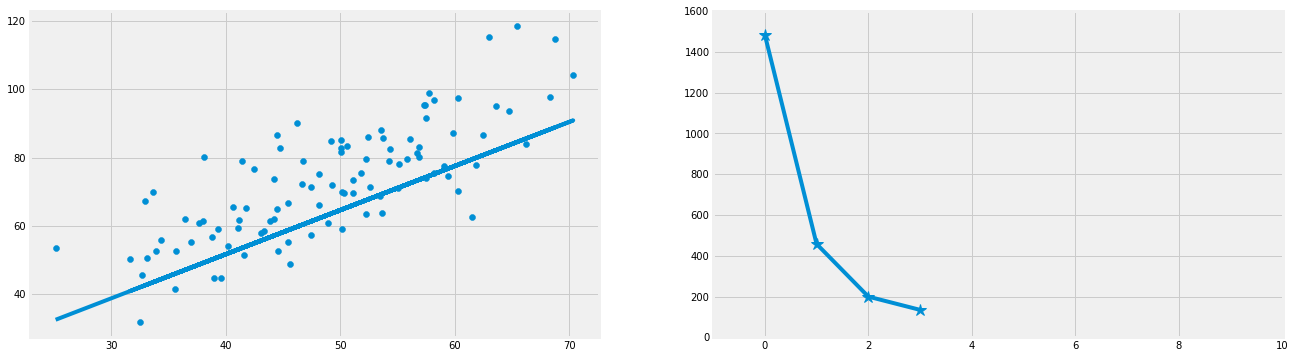

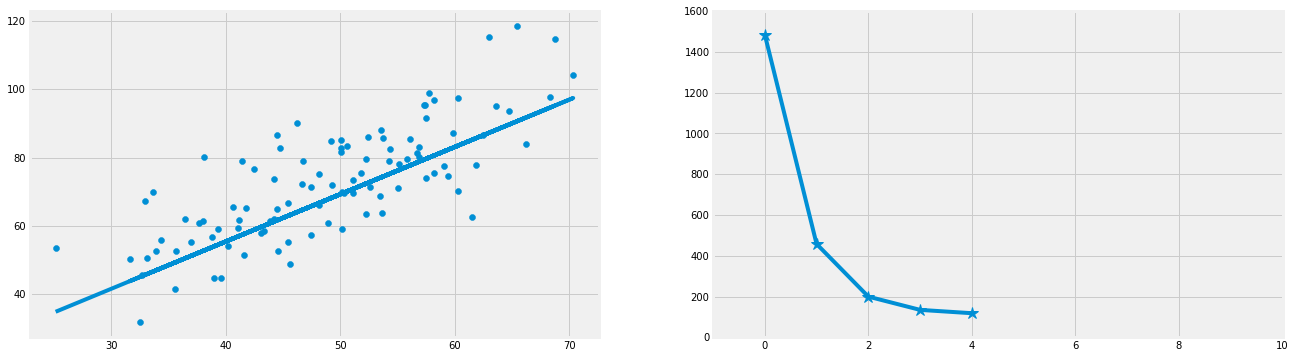

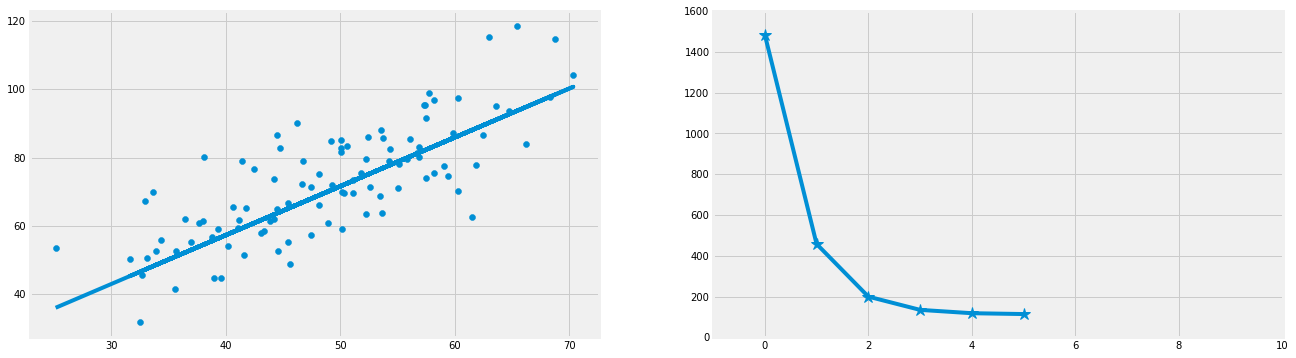

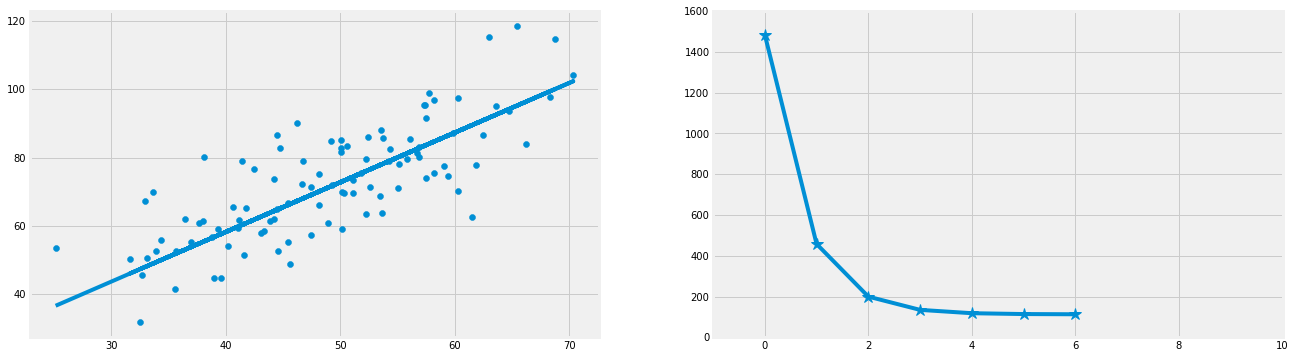

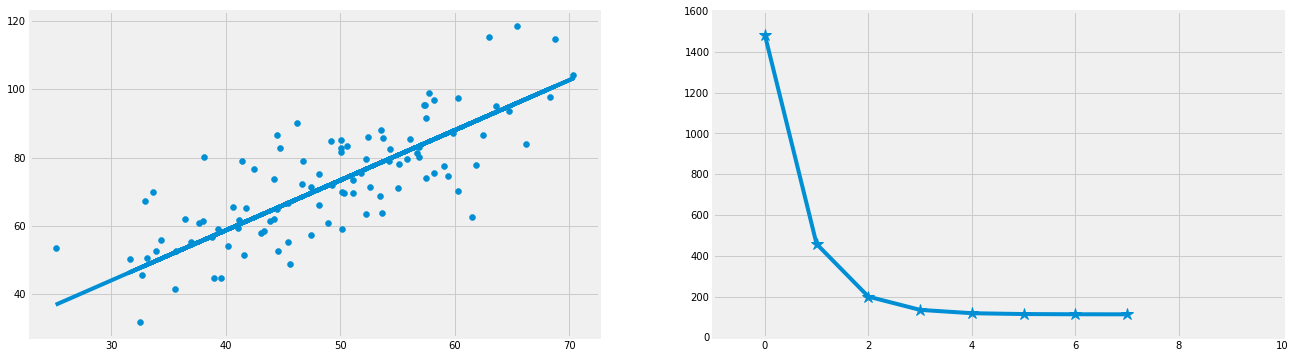

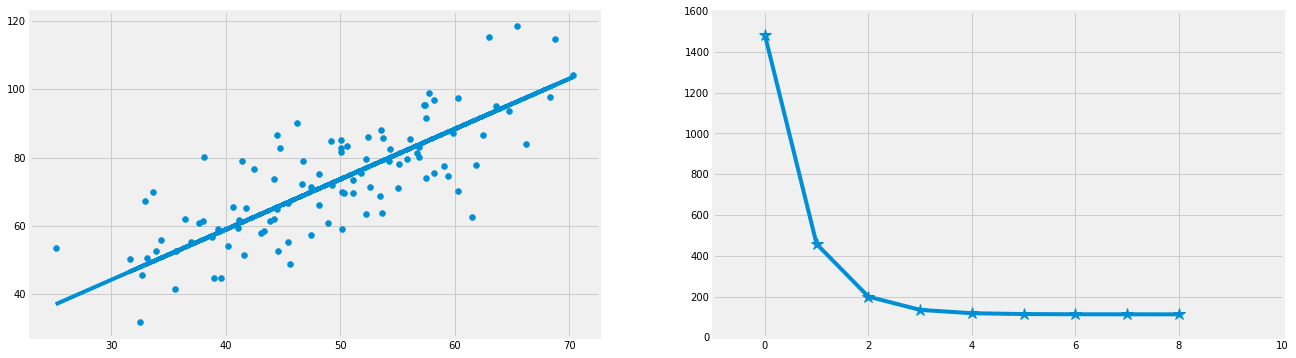

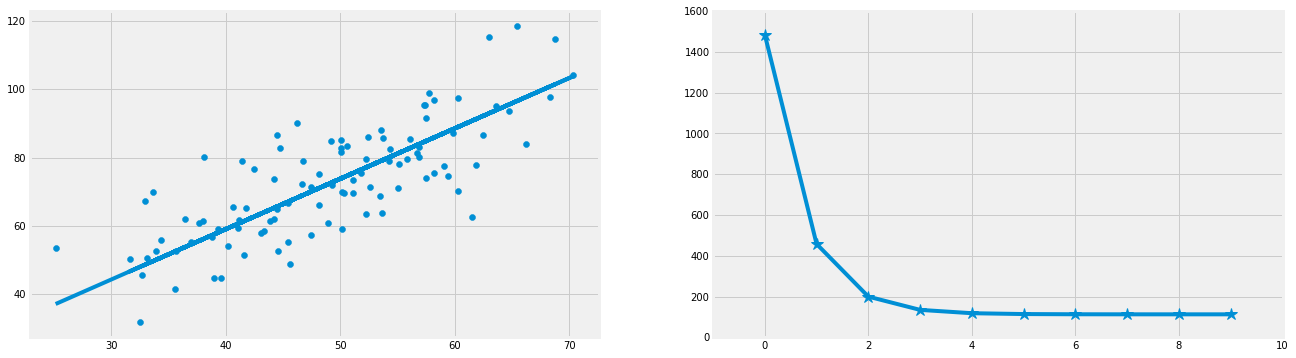

In [64]:
gradient_descent(points= data,
                       learning_rate = 0.0001,
                       starting_b = 0,
                       starting_m = 0,
                       num_iterations = 10)